In [1]:
import random
import cv2
import numpy as np
import cmath
import math
from tqdm import tqdm
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib import pyplot
import statistics
from random import randint

In [2]:
def histogram_equilization(image):
    # read a image using imread
    im = cv2.imread(image, 0)
    img = cv2.resize(im, (128,128))
    h, w = img.shape
    img_new = np.zeros([h, w])

    # Calculatig r(k)
    rk = 256 * [None]
    for i in range(0 , 256):
        rk[i] = i

    nk = 256 * [0]
    sk = 256 * [0]
    sk = 256 * [None]
    sk_rounded = 256 * [None]
    ps_sk = 256 * [None]

    # Calculatig n(k)
    for k in range(0 , len(rk)):
        count = 0;
        for i in range(0 , h):
            for j in range(0 , w):
                if img[i][j] == rk[k]:
                    count += 1
        nk[k] = count

    # Calculatig p(r[k])
    pr_rk = []
    for i in range(0 , len(nk)):
        pr_rk.append(nk[i] / (h*w))


    # Calculatig s(k)    
    for i in range(0 , len(pr_rk)):
        sk[i] = ((255*(sum(pr_rk[:i+1]))))
        sk_rounded[i] = (round(255*(sum(pr_rk[:i+1]))))
        ps_sk[i] = pr_rk[i]

    # Calculatig the new image
    for i in range(0 , h):
        for j in range(0 , w):
            img_new[i][j] = sk_rounded[img[i][j]]
    return img, img_new, rk, pr_rk, sk, sk_rounded, ps_sk

In [3]:
def averagig_filter(filter_size,image):
    filter_size = filter_size
    value_of_padding = int((filter_size-1) /2)
    img = cv2.imread(image,0).astype('float64')
    plt.imshow(img)
    img_pad = cv2.copyMakeBorder(img, value_of_padding, value_of_padding, value_of_padding, value_of_padding, cv2.BORDER_CONSTANT, (0,0,0))

    h, w = img.shape

    # Develop Averaging filter(3, 3) mask
    mask = np.ones([filter_size, filter_size], dtype = int)
    mask = mask / filter_size**2

    # Convolve the 3X3 mask over the image
    img_new = np.zeros([h, w])

    value1 = 0
    value2 = 0
    for i in range( int((filter_size-1) /2) , h + value_of_padding):
        value2 = 0
        for j in range( int((filter_size-1) /2) , w + value_of_padding):
            value = 0
            img_new[value1][value2] = 0
            row = i
            col = j

            for l in range(0 , filter_size):
                col = j
                for k in range(0 , filter_size):
                    value += img_pad[row - value_of_padding][col - value_of_padding] * mask[l][k]
                    col += 1
                row += 1
            img_new[value1][value2] = float(value)
            value2+=1
        value1+=1
#     img_new = img_new.astype(np.uint8)
    cv2.imwrite('Average_Output.png', img_new)
    return (img_new)

In [4]:
def Median_filter(filter_size,image):
    filter_size = filter_size
    value_of_padding = int((filter_size-1) /2)
    img = cv2.imread(image,0).astype('float64')
    img_pad = cv2.copyMakeBorder(img, value_of_padding, value_of_padding, value_of_padding, value_of_padding, cv2.BORDER_CONSTANT, (0,0,0))

    h, w = img.shape

    # Convolve the 3X3 mask over the image
    img_new = np.zeros([h, w])

    value1 = 0
    value2 = 0
    for i in range( int((filter_size-1) /2) , h + value_of_padding):
        value2 = 0
        for j in range( int((filter_size-1) /2) , w + value_of_padding):
            value = 0
            img_new[value1][value2] = 0
            row = i
            col = j

            all_values = []
            for l in range(0 , filter_size):
                col = j
                for k in range(0 , filter_size):
                    all_values.append(img_pad[row - value_of_padding][col - value_of_padding])
                    col += 1
                row += 1
            all_values = sorted(all_values)
            value = all_values[int(len(all_values)/2)]
            img_new[value1][value2] = value
            value2+=1
        value1+=1
#     img_new = img_new.astype(np.uint8)
    cv2.imwrite('Median_output.png', img_new)
    return (img_new)

In [5]:
def Max_filter(filter_size,image):
    filter_size = filter_size
    value_of_padding = int((filter_size-1) /2)
    img = cv2.imread(image,0).astype('float64')
    img_pad = cv2.copyMakeBorder(img, value_of_padding, value_of_padding, value_of_padding, value_of_padding, cv2.BORDER_CONSTANT, (0,0,0))

    h, w = img.shape

    # Convolve the 3X3 mask over the image
    img_new = np.zeros([h, w])

    value1 = 0
    value2 = 0
    for i in range( int((filter_size-1) /2) , h + value_of_padding):
        value2 = 0
        for j in range( int((filter_size-1) /2) , w + value_of_padding):
            value = 0
            img_new[value1][value2] = 0
            row = i
            col = j

            all_values = []
            for l in range(0 , filter_size):
                col = j
                for k in range(0 , filter_size):
                    all_values.append(img_pad[row - value_of_padding][col - value_of_padding])
                    col += 1
                row += 1
            value = max(all_values)
            img_new[value1][value2] = value
            value2+=1
        value1+=1
#     img_new = img_new.astype(np.uint8)
    cv2.imwrite('Median_output.png', img_new)
    return (img_new)

In [6]:
def Min_filter(filter_size,image):
    filter_size = filter_size
    value_of_padding = int((filter_size-1) /2)
    img = cv2.imread(image,0).astype('float64')
    img_pad = cv2.copyMakeBorder(img, value_of_padding, value_of_padding, value_of_padding, value_of_padding, cv2.BORDER_CONSTANT, (0,0,0))

    h, w = img.shape

    # Convolve the 3X3 mask over the image
    img_new = np.zeros([h, w])

    value1 = 0
    value2 = 0
    for i in range( int((filter_size-1) /2) , h + value_of_padding):
        value2 = 0
        for j in range( int((filter_size-1) /2) , w + value_of_padding):
            value = 0
            img_new[value1][value2] = 0
            row = i
            col = j

            all_values = []
            for l in range(0 , filter_size):
                col = j
                for k in range(0 , filter_size):
                    all_values.append(img_pad[row - value_of_padding][col - value_of_padding])
                    col += 1
                row += 1
            value = min(all_values)
            img_new[value1][value2] = value
            value2+=1
        value1+=1
#     img_new = img_new.astype(np.uint8)
    cv2.imwrite('Median_output.png', img_new)
    return (img_new)

In [7]:
def laplace_first_filter(filter_size,image):
    filter_size = filter_size
    value_of_padding = int((filter_size-1) /2)
    img = cv2.imread(image,0)
    img_pad = cv2.copyMakeBorder(img, value_of_padding, value_of_padding, value_of_padding, value_of_padding, cv2.BORDER_CONSTANT, (0,0,0))

    h, w = img.shape

    # Develop Averaging filter(3, 3) mask
    mask = np.array([(0,1,0),(1,-4,1),(0,1,0)])

    # Convolve the 3X3 mask over the image
    img_new = np.zeros([h, w])

    value1 = 0
    value2 = 0
    for i in range( int((filter_size-1) /2) , h + value_of_padding):
        value2 = 0
        for j in range( int((filter_size-1) /2) , w + value_of_padding):
            value = 0
            img_new[value1][value2] = 0
            row = i
            col = j

            for l in range(0 , filter_size):
                col = j
                for k in range(0 , filter_size):
                    value += img_pad[row - value_of_padding][col - value_of_padding] * mask[l][k]
                    col += 1
                row += 1
            img_new[value1][value2] = (value)
            value2+=1
        value1+=1
#     img_new = img_new.astype(np.uint8)
    cv2.imwrite('laplacian_Output.jpg', img_new)
    return (img_new)

def laplace_second_filter(filter_size,image):
    filter_size = filter_size
    value_of_padding = int((filter_size-1) /2)
    img = cv2.imread(image,0).astype('float64')
    img_pad = cv2.copyMakeBorder(img, value_of_padding, value_of_padding, value_of_padding, value_of_padding, cv2.BORDER_CONSTANT, (0,0,0))
    h, w = img.shape

    # Develop Averaging filter(3, 3) mask
    mask = np.array([(0,-1,0),(-1,4,-1),(0,-1,0)])

    # Convolve the 3X3 mask over the image
    img_new = np.zeros([h, w])

    value1 = 0
    value2 = 0
    for i in range( int((filter_size-1) /2) , h + value_of_padding):
        value2 = 0
        for j in range( int((filter_size-1) /2) , w + value_of_padding):
            value = 0
            img_new[value1][value2] = 0
            row = i
            col = j

            for l in range(0 , filter_size):
                col = j
                for k in range(0 , filter_size):
                    value += img_pad[row - value_of_padding][col - value_of_padding] * mask[l][k]
                    col += 1
                row += 1
#             print(value)
#             bla
            img_new[value1][value2] = (value)
            value2+=1
        value1+=1
#     img_new = img_new.astype(np.uint8)
#     print(img_new)
    cv2.imwrite('laplacian_Output.jpg', img_new)
    return (img_new)

def laplace_third_filter(filter_size,image):
    filter_size = filter_size
    value_of_padding = int((filter_size-1) /2)
    img = cv2.imread(image,0)
    img_pad = cv2.copyMakeBorder(img, value_of_padding, value_of_padding, value_of_padding, value_of_padding, cv2.BORDER_CONSTANT, (0,0,0))

    h, w = img.shape

    # Develop Averaging filter(3, 3) mask
    mask = np.array([(0,-1,0),(-1,8,-1),(0,-1,0)])

    # Convolve the 3X3 mask over the image
    img_new = np.zeros([h, w])

    value1 = 0
    value2 = 0
    for i in range( int((filter_size-1) /2) , h + value_of_padding):
        value2 = 0
        for j in range( int((filter_size-1) /2) , w + value_of_padding):
            value = 0
            img_new[value1][value2] = 0
            row = i
            col = j

            for l in range(0 , filter_size):
                col = j
                for k in range(0 , filter_size):
                    value += img_pad[row - value_of_padding][col - value_of_padding] * mask[l][k]
                    col += 1
                row += 1
            img_new[value1][value2] = (value)
            value2+=1
        value1+=1
#     img_new = img_new.astype(np.uint8)
    cv2.imwrite('laplacian_Output.jpg', img_new)
    return (img_new)

def laplace_fourth_filter(filter_size,image):
    filter_size = filter_size
    value_of_padding = int((filter_size-1) /2)
    img = cv2.imread(image,0)
    img_pad = cv2.copyMakeBorder(img, value_of_padding, value_of_padding, value_of_padding, value_of_padding, cv2.BORDER_CONSTANT, (0,0,0))

    h, w = img.shape

    # Develop Averaging filter(3, 3) mask
    mask = np.array([(0,1,0),(1,-8,1),(0,1,0)])

    # Convolve the 3X3 mask over the image
    img_new = np.zeros([h, w])

    value1 = 0
    value2 = 0
    for i in range( int((filter_size-1) /2) , h + value_of_padding):
        value2 = 0
        for j in range( int((filter_size-1) /2) , w + value_of_padding):
            value = 0
            img_new[value1][value2] = 0
            row = i
            col = j

            for l in range(0 , filter_size):
                col = j
                for k in range(0 , filter_size):
                    value += img_pad[row - value_of_padding][col - value_of_padding] * mask[l][k]
                    col += 1
                row += 1
            img_new[value1][value2] = (value)
            value2+=1
        value1+=1
#     img_new = img_new.astype(np.uint8)
    cv2.imwrite('laplacian_Output.jpg', img_new)
    return (img_new)

In [60]:
def Unsharp_Masking_Highboost_Filtering(image , img_new):
    image = cv2.imread(image,0).astype('float64')
    image_mask = image - img_new
    image_new = image + image_mask
    return image_new

In [8]:
def sobel_horizontal_mask(image):
    from matplotlib import pyplot
    filter_size = 3
    value_of_padding = int((filter_size-1) /2)
    img = cv2.imread(image,0)
    img_pad = cv2.copyMakeBorder(img, value_of_padding, value_of_padding, value_of_padding, value_of_padding, cv2.BORDER_CONSTANT, (0,0,0))

    h, w = img.shape

    # Develop Averaging filter(3, 3) mask
    vertical_mask = np.array(([1, 0, -1], [2, 0, -2], [1, 0, 1]))
    horizontal_mask = np.array(([1, 2 ,1], [0, 0, 0], [-1, -2 , -1]))

    # Convolve the 3X3 mask over the image
    img_new = np.zeros([h, w])

    value1 = 0
    value2 = 0


    for i in range( int((filter_size-1) /2) , h + value_of_padding):
        value2 = 0
        for j in range( int((filter_size-1) /2) , w + value_of_padding):
            value = 0
            img_new[value1][value2] = 0
            row = i
            col = j

            for l in range(0 , filter_size):
                col = j
                for k in range(0 , filter_size):
                    value += img_pad[row - value_of_padding][col - value_of_padding] * horizontal_mask[l][k]
                    col += 1
                row += 1
            img_new[value1][value2] = int(value)
            value2+=1
        value1+=1
    # img_new = img_new.astype(np.uint8)

    display(pyplot.imshow(img_new,cmap="gray"))
    img_new
    cv2.imwrite('horizontal_sobel.jpg', img_new)
    return (img_new)

def sobel_vertical_mask(image):
    from matplotlib import pyplot
    filter_size = 3
    value_of_padding = int((filter_size-1) /2)
    img = cv2.imread(image,0)
    img_pad = cv2.copyMakeBorder(img, value_of_padding, value_of_padding, value_of_padding, value_of_padding, cv2.BORDER_CONSTANT, (0,0,0))

    h, w = img.shape

    # Develop Averaging filter(3, 3) mask
    vertical_mask = np.array(([1, 0, -1], [2, 0, -2], [1, 0, 1]))
    horizontal_mask = np.array(([1, 2 ,1], [0, 0, 0], [-1, -2 , -1]))

    # Convolve the 3X3 mask over the image
    img_new = np.zeros([h, w])

    value1 = 0
    value2 = 0


    for i in range( int((filter_size-1) /2) , h + value_of_padding):
        value2 = 0
        for j in range( int((filter_size-1) /2) , w + value_of_padding):
            value = 0
            img_new[value1][value2] = 0
            row = i
            col = j

            for l in range(0 , filter_size):
                col = j
                for k in range(0 , filter_size):
                    value += img_pad[row - value_of_padding][col - value_of_padding] * vertical_mask[l][k]
                    col += 1
                row += 1
            img_new[value1][value2] = int(value)
            value2+=1
        value1+=1

    display(pyplot.imshow(img_new,cmap="gray"))
    img_new
    cv2.imwrite('vertical_sobel.jpg', img_new)
    return (img_new)

In [9]:
def Robert_cross_gradient(image):
    img = cv2.imread(image,0).astype('float64')
    filter_size = 3
    h, w = img.shape

    img_pad = cv2.copyMakeBorder(img, 1, 1, 1, 1, cv2.BORDER_CONSTANT, (0,0,0))
    # Convolve the 3X3 mask over the image
    img_new = np.zeros([h, w])
    value1 = 0
    for i in range(1 , h+1):
        value2 = 0
        for j in range(1 , w+1):
            value = 0
            img_new[value1][value2] = 0
            row = i
            col = j        
            img_new[value1][value2] = abs(img_pad[i+1][j+1] - img_pad[i][j])  +  abs(img_pad[i+1][j] - img_pad[i][j+1])
            value2 += 1
        value1 += 1
    img_new = img_new.astype(np.uint8)
    cv2.imwrite('Roberts_output.jpg', img_new)
    return (img_new)

In [10]:
def NN_interpolation(img):
    row,col = img.shape

    # the new size of image
    newr = 512
    newc = 512

    #ratio of the new size by the old size
    rtR = row/newr
    rtC = col/newc

    # define the interpolated positions
    IR = []
    for i in range(0, newr):
        IR.append(i)

    for i in range(0, newr):
        IR[i] = math.floor(IR[i]*rtR)

    IC = []
    for i in range(0, newc):
        IC.append(i)

    for i in range(0, newc):
        IC[i] = math.floor(IC[i]*rtC)

    new_img = np.zeros((newr,newc))    
    i = 0
    j = 0
    for r in range(0, newr):
        x = IR[i]
        j = 0
        for c in range(0, newc):
            y = IC[j]
            new_img[r][c] = img[x][y]
            j += 1
        i += 1
    new_img = new_img.astype(np.uint8)
    return new_img

# Salt and pepper noise

In [53]:
def add_sp_noise(img):
 
    # Getting the dimensions of the image
    row , col = img.shape
    k = 0.05
    for i in range(0, row):
        for j in range(0, col):
            rand = random.random()
            if(rand < k):
                img[i][j] = 0
            elif(rand > 1-k):
                img[i][j] = 255
            else:
                img[i][j] = img[i][j]
    return img

# Gaussian Noise

In [57]:
def add_gaussian_noise(img):
    img = cv2.imread(img,0).astype('float64')
    img_flatten = img.flatten()
    std = np.std(img_flatten)
    mean = statistics.mean(img_flatten)
    noise = np.random.normal(mean, std, img.shape)
    new_signal = img + noise
    return new_signal

# Averaging Filter

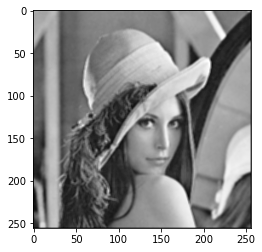

In [8]:
image = averagig_filter(3 , 'lena.jpg')
plt.imshow(image , cmap="gray")

# Median filter

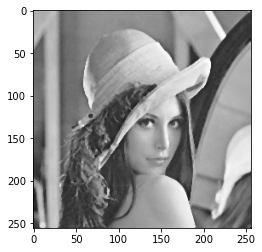

In [9]:
image = Median_filter(3 , 'lena.jpg')
plt.imshow(image , cmap="gray")

# Max Operator

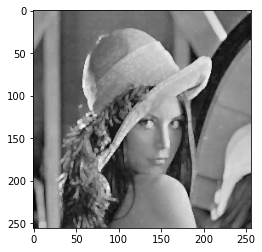

In [10]:
image = Max_filter(3 , 'lena.jpg')
plt.imshow(image , cmap="gray")

# Min Operator 

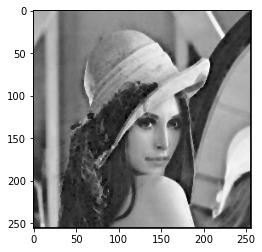

In [11]:
image = Min_filter(3 , 'lena.jpg')
plt.imshow(image , cmap="gray")

# Unsharp Masking and Highboost Filtering

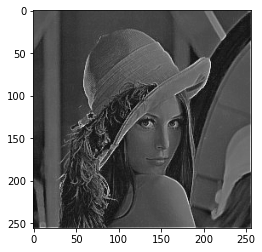

In [64]:
image_min = Min_filter(3 , 'lena.jpg')
image = 'lena.jpg'
image_bh = Unsharp_Masking_Highboost_Filtering(image,image_min)
plt.imshow(image_bh , cmap="gray")

# Sobel operator

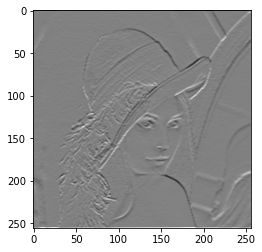

In [12]:
image = sobel_horizontal_mask('lena.jpg')
plt.imshow(image , cmap="gray")

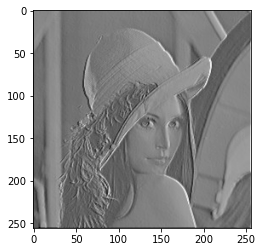

In [13]:
image = sobel_vertical_mask('lena.jpg')
plt.imshow(image , cmap="gray")

# La-place operator

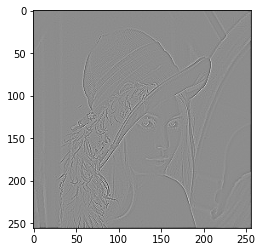

In [14]:
image = laplace_first_filter(3 , 'lena.jpg')
plt.imshow(image , cmap="gray")

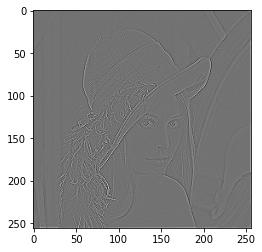

In [15]:
image = laplace_second_filter(3 , 'lena.jpg')
plt.imshow(image , cmap="gray")

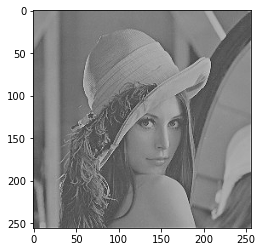

In [16]:
image = laplace_third_filter(3 , 'lena.jpg')
plt.imshow(image , cmap="gray")

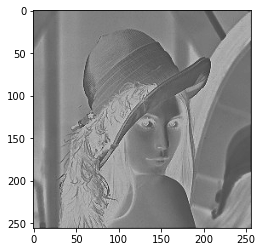

In [17]:
image = laplace_fourth_filter(3 , 'lena.jpg')
plt.imshow(image , cmap="gray")

# Roberts Cross-gradient Operators

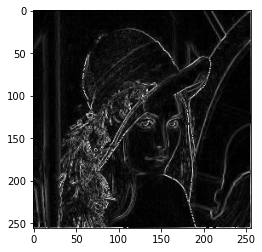

In [35]:
image = Robert_cross_gradient('lena.jpg')
plt.imshow(image , cmap="gray")

# NN_Interpolation

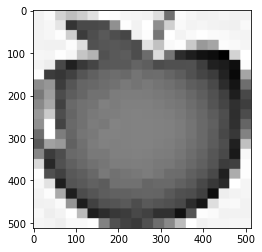

In [48]:
img = cv2.imread('apple.jpg', cv2.IMREAD_GRAYSCALE)

#Storing the image
new_image = NN_interpolation(img)
cv2.imwrite('NN_apple.jpg', new_image)
plt.imshow(new_image, cmap="gray")

# Histo_gram equilization

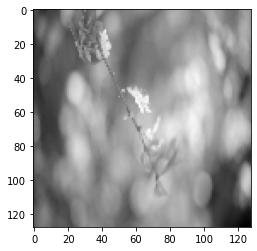

In [18]:
img, img_new, rk, pr_rk, sk, sk_rounded, ps_sk = histogram_equilization('Flower.jpeg')
plt.imshow(img, cmap="gray")

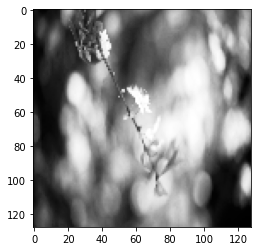

In [19]:
plt.imshow(img_new, cmap="gray")

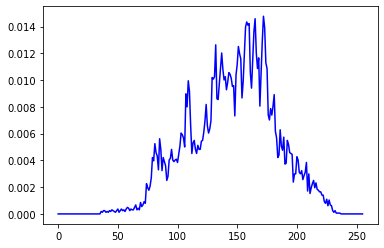

In [20]:
plt.plot(rk,pr_rk, color = 'b')
plt.show()

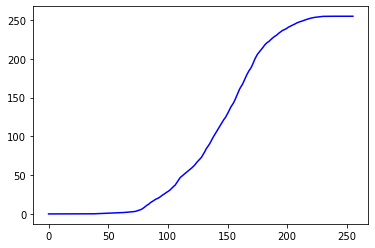

In [21]:
plt.plot(rk,sk, color = 'b')
plt.show()

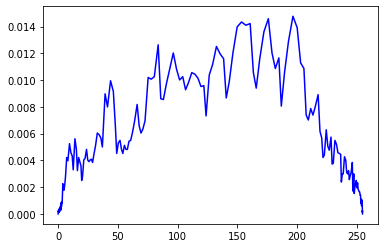

In [22]:
plt.plot(sk,ps_sk, color = 'b')
plt.show()

# Salt and Pepper Noise

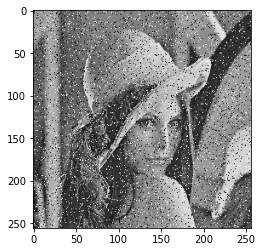

In [55]:
img = cv2.imread('lena.jpg',0)
new_img = add_sp_noise(img)
cv2.imwrite('salt-and-pepper-lena.jpg',new_img)
plt.imshow(new_img, cmap="gray")

# Gaussian Noise

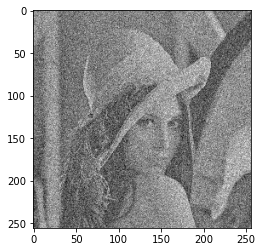

In [59]:
new_img = add_gaussian_noise('lena.jpg')
cv2.imwrite('gaussian_noise_addition.jpg',new_img)
plt.imshow(new_img, cmap="gray")